# Gradient Boosting classification

![image.png](attachment:image.png)

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train dataset

In [3]:
import pandas as pd 
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# check missing value

In [6]:
m= df.isna().sum()

In [7]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# duplicate in dataframe

In [8]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# seperate cat con features

In [13]:
cat = list(X.columns[X.dtypes== "object"])
con = list(X.columns[X.dtypes!= "object"])

In [14]:
cat

['Sex', 'Embarked']

In [15]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# create preproccessing pipeline for x

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [20]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [21]:
cols = pre.get_feature_names_out()
cols

array(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'], dtype=object)

In [22]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [23]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

### Train test split

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [25]:
xtrain.shape

(712, 10)

In [26]:
xtest.shape

(179, 10)

In [27]:
ytrain.value_counts()

Survived
0           444
1           268
Name: count, dtype: int64

In [28]:
ytest.value_counts()

Survived
0           105
1            74
Name: count, dtype: int64

# create a gradient boosting model

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.001, n_estimators=1, max_depth=2, min_samples_split=5, min_samples_leaf=5)
model.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.001, max_depth=2, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [30]:
model.score(xtrain, ytrain)

0.6235955056179775

In [31]:
model.score(xtest, ytest)

0.5865921787709497

# hyperparameter tuning with randomised search cv

In [32]:
params = {'learning_rate':[0.01, 0.05, 0.1, 0.2],
          'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9, 10]}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [34]:
rscv.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'max_depth': 3,
 'learning_rate': 0.2}

In [35]:
rscv.best_score_


0.8011820003889356

In [36]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, min_samples_split=6,
                           n_estimators=10)

# evaluate model performance

In [37]:
best_gbc.score(xtrain, ytrain)

0.8455056179775281

In [38]:
best_gbc.score(xtest, ytest)

0.7932960893854749

#predict train and test result

In [39]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [40]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [41]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [42]:
ypred_ts[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [43]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


check the confusion matrix

In [44]:
c = best_gbc.classes_
c

array([0, 1], dtype=int64)

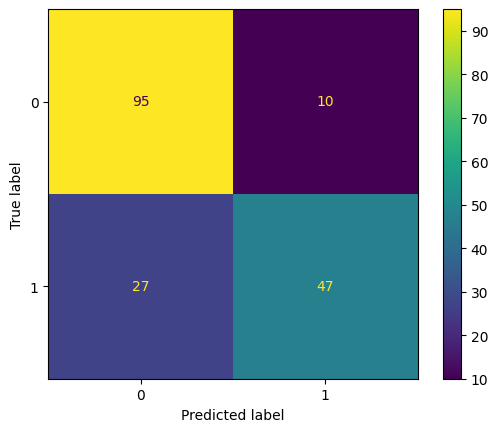

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

# check classification report

In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.82      0.64      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179

